<a href="https://colab.research.google.com/github/sarvan0506/AI/blob/Dev/Project%203/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

# install and import keras for neural network design and implementation

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# import keras objects for Convolution and import the dataset

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# load the datset into train and test sets

(60000, 28, 28)


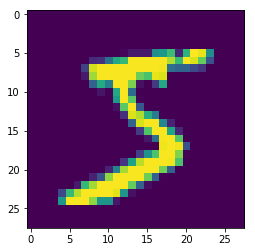

In [25]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# plotting a sample as image to get a visual feel

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# reshaping the dataset to Convolution format, X_train.shape[0] --> # of images, (28, 28) --> input image resolution, 1 - # of channels(the image itself).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# converting the values into greyscale values.

In [28]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:

from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # output 26
model.add(Convolution2D(32, 3, 3, activation='relu')) # output 24

model.add(MaxPooling2D(pool_size=(2,2))) # output 12
model.add(Convolution2D(12, 1, activation='relu')) # output 12

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 10
model.add(Convolution2D(16, 3, 3, activation='relu')) # output 8
model.add(Convolution2D(16, 3, 3, activation='relu')) # output 6

model.add(Convolution2D(6, 1, activation='relu')) # output 6
model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 12)        396       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        1744      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# determining model evaluation metrics

In [34]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

# training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.2181 - acc: 0.9314
Epoch 2/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0765 - acc: 0.9764
Epoch 3/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0602 - acc: 0.9816
Epoch 4/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.0503 - acc: 0.9847
Epoch 5/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0440 - acc: 0.9863
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0392 - acc: 0.9876
Epoch 7/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0347 - acc: 0.9895
Epoch 8/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0310 - acc: 0.9899
Epoch 9/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.0284 - acc: 0.9906
Epoch 10/20
60000/60000 [==============================] - 11s 190us/step - loss: 

Model is reaching 99.4 in 16th epoch

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

# validation score on test data

In [36]:
print(score)

[0.04270613472409077, 0.9886]


In [0]:
y_pred = model.predict(X_test)

In [38]:
print(y_pred[:9])
print(y_test[:9])

# As we can see below the number indicating the class in each of the arrays listed below, is close to 1 and all the other numbers are far less than that

[[1.4610104e-21 2.2711864e-20 3.5913419e-12 4.2556643e-13 2.1818318e-26
  3.6567977e-17 0.0000000e+00 1.0000000e+00 1.8387095e-19 2.8225698e-14]
 [1.5687892e-11 1.7534019e-11 1.0000000e+00 5.6956708e-18 1.2313859e-17
  2.0599855e-21 2.8073965e-14 6.0782879e-20 6.0800491e-13 9.7462376e-24]
 [4.8068118e-09 9.9960786e-01 1.7755800e-09 2.9961498e-09 3.8275964e-04
  8.4441939e-07 2.1247759e-08 3.3627769e-06 3.0782066e-06 2.0756804e-06]
 [1.0000000e+00 7.4433417e-31 2.6084185e-15 6.3571738e-20 7.0014220e-23
  3.1917299e-14 2.0645392e-11 5.9716708e-20 5.3504282e-13 3.1044509e-12]
 [3.5598614e-15 3.5972020e-12 2.0201811e-12 8.5300267e-15 9.9999964e-01
  5.5689557e-13 1.3016729e-12 1.5248909e-10 5.3947427e-14 3.5991224e-07]
 [2.9809044e-08 9.9998760e-01 1.3133158e-08 1.3962492e-10 7.9125239e-06
  5.2584159e-10 1.0027376e-08 3.8741009e-06 2.0972611e-07 3.5939925e-07]
 [5.0126595e-26 4.5569908e-14 3.5345790e-10 5.0357220e-16 9.9999559e-01
  3.0600344e-16 1.3725724e-25 1.2013157e-08 1.2921902e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Storing model architecture to a dictionary

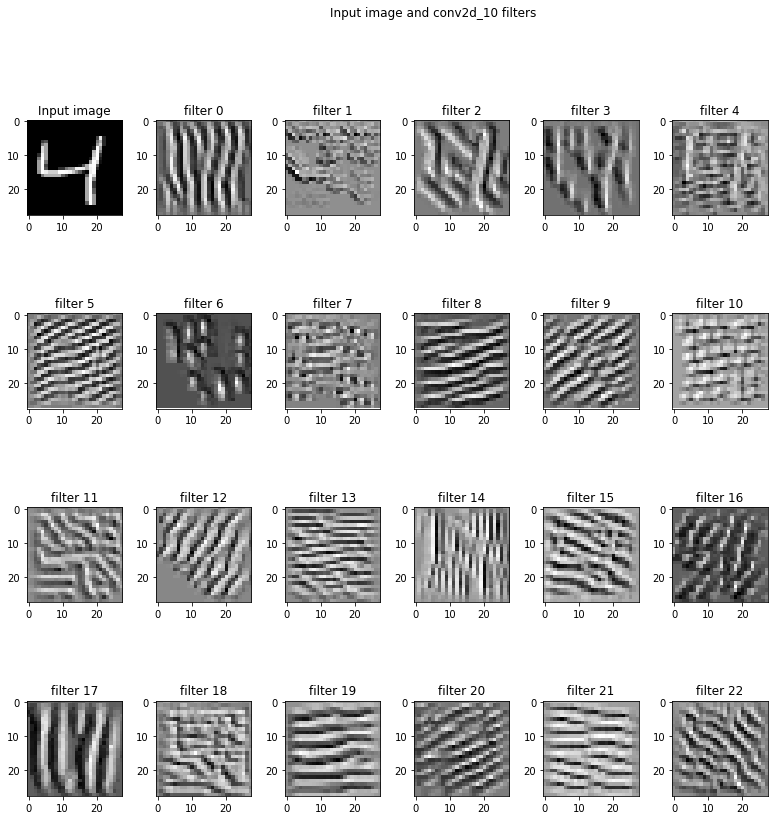

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_10'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()